# Notebook to analyse the demographic and clinical information from the cohort

This notebook is used to create Table 1 of the manuscript

In [ ]:
import os
import numpy as np
import pandas as pd
from aidhs.paths import BASE_PATH

Load the dataset with subjects to include and the demographic file 

In [2]:
# get list of subjects
dataset_file = os.path.join(BASE_PATH,'dataset_all_with_bilateral.csv')
df_dataset = pd.read_csv(dataset_file)

subjects = df_dataset['subject_id'].values
print(len(subjects))

365


In [ ]:
#get demographic information
csv_file = os.path.join(BASE_PATH,'demographics_file.csv')
df_demos = pd.read_csv(csv_file)
df_demos.head()

Create a dataframe with the demographic information for each subject of the dataset

In [4]:
df=pd.DataFrame()
for subject in subjects : 
    # print(subject)
    row=df_demos[df_demos['ID ']==subject]
    values={}
    values['ID']=subject
    values['site']=row["Site"].values[0]
    values['group'] = row["group"].values[0]
    values['lesional_hemi'] = row["Lesional hemi"].values[0]
    values['age_scan'] = row["Age at preoperative"].values[0]
    values['sex'] = row["Sex"].values[0]
    values['mri_neg'] = row["Ever reported MRI negative (yes=1, no=0, control=666)"].values[0]
    values['age_onset'] = row["Age of onset of epilepsy (yr)  (control= 666)"].values[0]
    values['lobes'] = row["Lobes"].values[0]
    df2 = pd.DataFrame([values])
    df = pd.concat([df, df2], ignore_index=True)

### Analyse cohort 

Analyse per group

In [5]:
df.groupby(['group']).count()

,ID,site,lesional_hemi,age_scan,sex,mri_neg,age_onset,lobes
group,,,,,,,,
C,121,121,0,121,121,0,0,0
DC,90,90,27,90,90,57,33,60
P,154,154,152,154,154,152,149,80


In [6]:
df.groupby(['site','group'])['ID'].count()

site  group
H1    C        91
      DC       27
      P        24
H11   DC       33
      P        72
H16   DC       30
      P        13
H29   C        30
      P        45
Name: ID, dtype: int64

Analyse the sex [ 0 male : 1 female]

In [7]:
df.groupby(['site', 'group', 'sex'])['ID'].count()

site  group  sex
H1    C      0.0    26
             1.0    65
      DC     0.0    12
             1.0    15
      P      0.0    13
             1.0    11
H11   DC     0.0    19
             1.0    14
      P      0.0    41
             1.0    31
H16   DC     0.0    15
             1.0    15
      P      0.0     6
             1.0     7
H29   C      0.0    12
             1.0    18
      P      0.0    17
             1.0    28
Name: ID, dtype: int64

In [8]:
df.groupby(['group', 'sex'])['ID'].count()

group  sex
C      0.0    38
       1.0    83
DC     0.0    46
       1.0    44
P      0.0    77
       1.0    77
Name: ID, dtype: int64

In [9]:
# chi square stats on sex
from scipy.stats import chisquare

m = np.array([[38,46,77],[83,44,77]])   # C - DC - P , M - F

count_group = m.sum(axis=0)   
count_sex = m.sum(axis=1)
tot = m.sum()


Emc  =  (count_group[0]*count_sex[0])/tot
Emdc =  (count_group[1]*count_sex[0])/tot
Emp  =  (count_group[2]*count_sex[0])/tot

Efc  =  (count_group[0]*count_sex[1])/tot
Efdc =  (count_group[1]*count_sex[1])/tot
Efp  =  (count_group[2]*count_sex[1])/tot

f_obs = m.flatten()
f_exp = np.array([Emc, Emdc, Emp, Efc, Efdc, Efp])

chisquare(f_obs=f_obs, f_exp=f_exp, ddof=2)

Power_divergenceResult(statistic=11.879095521707708, pvalue=0.0078090148911170885)

Analyse per age

In [29]:
df.groupby(['site','group'])['age_scan'].quantile([0.25,0.5,0.75])

site  group      
H1    C      0.25    10.037645
             0.50    13.460000
             0.75    16.546708
      DC     0.25     5.750000
             0.50     7.200000
             0.75    11.050000
      P      0.25     6.800000
             0.50    12.000000
             0.75    16.600000
H11   DC     0.25     9.000000
             0.50    15.000000
             0.75    23.000000
      P      0.25    19.000000
             0.50    25.500000
             0.75    30.000000
H16   DC     0.25    15.872500
             0.50    22.835000
             0.75    37.335000
      P      0.25    21.460000
             0.50    37.110000
             0.75    59.300000
H29   C      0.25    25.250000
             0.50    37.000000
             0.75    48.500000
      P      0.25    31.000000
             0.50    41.000000
             0.75    46.000000
Name: age_scan, dtype: float64

In [21]:
df.groupby(['site','group'])['age_scan'].max()

site  group
H1    C        59.52
      DC       16.70
      P        18.50
H11   DC       48.00
      P        39.00
H16   DC       59.08
      P        69.02
H29   C        64.00
      P        56.00
Name: age_scan, dtype: float64

In [34]:
df.groupby(['group'])['age_scan'].quantile([0.25,0.5,0.75])

group      
C      0.25    11.947981
       0.50    15.200548
       0.75    24.000000
DC     0.25     7.200000
       0.50    14.300000
       0.75    23.000000
P      0.25    18.000000
       0.50    26.500000
       0.75    38.000000
Name: age_scan, dtype: float64

Text(0, 0.5, 'number')

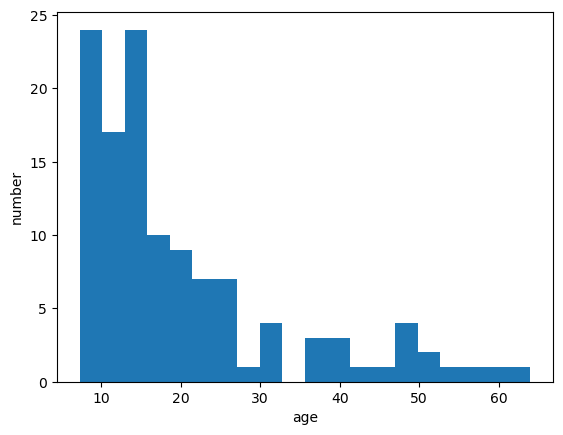

In [23]:
import matplotlib.pyplot as plt
age_controls = df[df['group']=='C']['age_scan'].values

plt.hist(age_controls, bins=20)
plt.xlabel('age')
plt.ylabel('number')


In [30]:
#categorise between children and adults

df['adult_child']=['child' if x<18 else 'adult' for x in df['age_scan']]
df.groupby(['adult_child'])['ID'].count()


adult_child
adult    200
child    165
Name: ID, dtype: int64

Analyse mri status (0 MRI negative , 1 MRI positive)

In [21]:
df.groupby(['site', 'group', 'mri_neg'])['ID'].count()

site  group  mri_neg
H1    DC     0.0        23
             1.0         4
      P      0.0        18
             1.0         4
H11   P      0.0        53
             1.0        19
H16   DC     0.0        29
             1.0         1
      P      0.0        12
             1.0         1
H29   P      0.0        45
Name: ID, dtype: int64

In [31]:
df.groupby(['site', 'group'])['age_onset'].quantile([0.25,0.5,0.75])

site  group      
H1    C      0.25      NaN
             0.50      NaN
             0.75      NaN
      DC     0.25      NaN
             0.50      NaN
             0.75      NaN
      P      0.25     1.25
             0.50     3.00
             0.75     6.75
H11   DC     0.25     4.00
             0.50     6.00
             0.75     8.00
      P      0.25     5.75
             0.50    11.00
             0.75    15.25
H16   DC     0.25      NaN
             0.50      NaN
             0.75      NaN
      P      0.25     9.00
             0.50    11.00
             0.75    29.00
H29   C      0.25      NaN
             0.50      NaN
             0.75      NaN
      P      0.25     3.00
             0.50    11.00
             0.75    17.00
Name: age_onset, dtype: float64

In [32]:
df.groupby(['group'])['age_onset'].quantile([0.25,0.5,0.75])

group      
C      0.25     NaN
       0.50     NaN
       0.75     NaN
DC     0.25     4.0
       0.50     6.0
       0.75     8.0
P      0.25     4.0
       0.50     9.0
       0.75    16.0
Name: age_onset, dtype: float64

In [33]:
## lobes in FCD


df.groupby(['group','lobes'])['ID'].count()

group  lobes                      
DC     frontal                        38
       frontal+insular                 2
       insular                         2
       occipital                       1
       parietal                        8
       temporal                        7
       temporal+frontal                1
       temporal+parietal+occipital     1
P      hemispherotomy                  2
       temporal                       77
       temporal+parietal+occipital     1
Name: ID, dtype: int64